In [ ]:
import numpy as np
import joblib
import json
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

In [ ]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# STEP 1: Load Pre-trained Models (MobileNetV2 and Random Forest)
# Load the pre-trained CNN model (MobileNetV2)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')
cnn_model = Model(inputs=base_model.input, outputs=base_model.output)

# Load the Random Forest model (assuming it's saved as 'rf_model.pkl')
rf_model = joblib.load('/content/drive/MyDrive/Models/rf_model.pkl')

# STEP 2: Load saved features, labels, and class names
features = np.load('/content/drive/MyDrive/Models/features.npy')
labels = np.load('/content/drive/MyDrive/Models/labels.npy')

# Load class names from JSON
with open('/content/drive/MyDrive/Models/class_names.json', 'r') as f:
    class_names = json.load(f)

# STEP 3: Function to Extract Features from an Image using MobileNetV2
def extract_feature_from_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_array)
    features = cnn_model.predict(img_preprocessed)
    return features.flatten()  # Flatten the feature vector

# STEP 4: Function for Disease Severity Estimation using OpenCV
def estimate_severity(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Mask green leaf area
    lower_green = np.array([25, 40, 40])
    upper_green = np.array([90, 255, 255])
    leaf_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Mask brown/yellowish (diseased area approx.)
    lower_brown = np.array([10, 50, 50])
    upper_brown = np.array([30, 255, 255])
    disease_mask = cv2.inRange(hsv, lower_brown, upper_brown)

    # Only count disease pixels within the leaf
    disease_in_leaf = cv2.bitwise_and(disease_mask, disease_mask, mask=leaf_mask)

    total_leaf = np.count_nonzero(leaf_mask)
    diseased_area = np.count_nonzero(disease_in_leaf)

    if total_leaf == 0:
        return 0

    severity = diseased_area / total_leaf
    print(f"🔬 Estimated Severity: {severity:.2%}")

    # Optional: Show mask results
    plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
    plt.subplot(1, 3, 2), plt.imshow(leaf_mask, cmap='gray'), plt.title('Leaf Mask')
    plt.subplot(1, 3, 3), plt.imshow(disease_in_leaf, cmap='hot'), plt.title('Disease Mask')
    plt.tight_layout()
    plt.show()

    return severity

# STEP 5: Full Pipeline to Classify Disease and Estimate Severity
def classify_and_estimate_severity(img_path):
    # Step 1: Classify disease using CNN + RF
    features = extract_feature_from_image(img_path)
    disease_pred = rf_model.predict([features])[0]
    disease_label = class_names[disease_pred]

    # Step 2: Estimate severity using image processing
    severity_score = estimate_severity(img_path)
    severity_level = (
        "Mild" if severity_score < 0.2 else
        "Moderate" if severity_score < 0.5 else
        "Severe"
    )

    # Final Output
    print(f"🌿 Predicted Disease: {disease_label}")
    print(f"🩺 Estimated Severity: {severity_score:.2%} ({severity_level})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
🔬 Estimated Severity: 76.62%


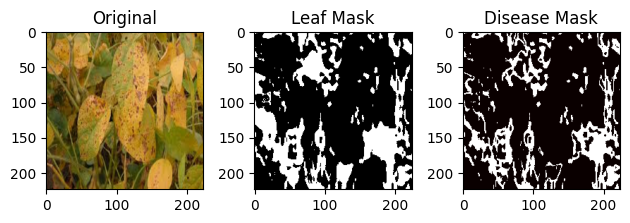

🌿 Predicted Disease: Septoria
🩺 Estimated Severity: 76.62% (Severe)


In [ ]:
# Test the pipeline with an image
image_path = '/content/drive/MyDrive/Testing/septoria.jpeg'  # Replace with your image path
classify_and_estimate_severity(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
🔬 Estimated Severity: 5.04%


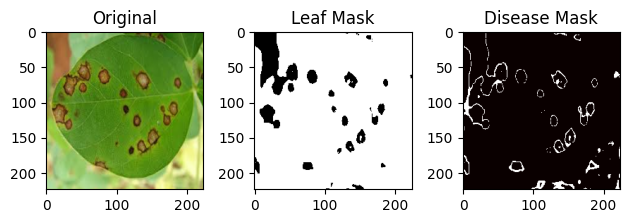

🌿 Predicted Disease: Frogeye_Leaf_Spot
🩺 Estimated Severity: 5.04% (Mild)


In [ ]:
# Test the pipeline with an image
image_path = '/content/drive/MyDrive/Testing/frogeye.jpeg'  # Replace with your image path
classify_and_estimate_severity(image_path)

In [ ]:
import numpy as np
import joblib
import json
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 1: Load Pre-trained Models (MobileNetV2 and Random Forest)
# Load the pre-trained CNN model (MobileNetV2)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')
cnn_model = Model(inputs=base_model.input, outputs=base_model.output)

# Load the Random Forest model (assuming it's saved as 'rf_model.pkl')
rf_model = joblib.load('/content/drive/MyDrive/Models/rf_model.pkl')

# STEP 2: Load saved features, labels, and class names
features = np.load('/content/drive/MyDrive/Models/features.npy')
labels = np.load('/content/drive/MyDrive/Models/labels.npy')

# Load class names from JSON
with open('/content/drive/MyDrive/Models/class_names.json', 'r') as f:
    class_names = json.load(f)

# STEP 3: Function to Extract Features from an Image using MobileNetV2
def extract_feature_from_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_array)
    features = cnn_model.predict(img_preprocessed)
    return features.flatten()  # Flatten the feature vector

# STEP 4: Function for Disease Severity Estimation using OpenCV
def estimate_severity(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Mask green leaf area
    lower_green = np.array([25, 40, 40])
    upper_green = np.array([90, 255, 255])
    leaf_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Mask brown/yellowish (diseased area approx.)
    lower_brown = np.array([10, 50, 50])
    upper_brown = np.array([30, 255, 255])
    disease_mask = cv2.inRange(hsv, lower_brown, upper_brown)

    # Only count disease pixels within the leaf
    disease_in_leaf = cv2.bitwise_and(disease_mask, disease_mask, mask=leaf_mask)

    total_leaf = np.count_nonzero(leaf_mask)
    diseased_area = np.count_nonzero(disease_in_leaf)

    if total_leaf == 0:
        return 0

    severity = diseased_area / total_leaf
    print(f"🔬 Estimated Severity: {severity:.2%}")

    # Optional: Show mask results
    plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
    plt.subplot(1, 3, 2), plt.imshow(leaf_mask, cmap='gray'), plt.title('Leaf Mask')
    plt.subplot(1, 3, 3), plt.imshow(disease_in_leaf, cmap='hot'), plt.title('Disease Mask')
    plt.tight_layout()
    plt.show()

    return severity

# STEP 5: Full Pipeline to Classify Disease and Estimate Severity
def classify_and_estimate_severity(img_path):
    # Step 1: Classify disease using CNN + RF
    features = extract_feature_from_image(img_path)
    disease_pred = rf_model.predict([features])[0]
    disease_label = class_names[disease_pred]

    # Step 2: Estimate severity using image processing
    severity_score = estimate_severity(img_path)
    severity_level = (
        "Mild" if severity_score < 0.2 else
        "Moderate" if severity_score < 0.5 else
        "Severe"
    )

    # Final Output
    print(f"🌿 Predicted Disease: {disease_label}")
    print(f"🩺 Estimated Severity: {severity_score:.2%} ({severity_level})")